In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Load
# Loading the dataset into a pandas DataFrame (assuming 'data.csv' is the dataset)
data=pd.read_csv('loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.shape

(614, 13)

In [ ]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


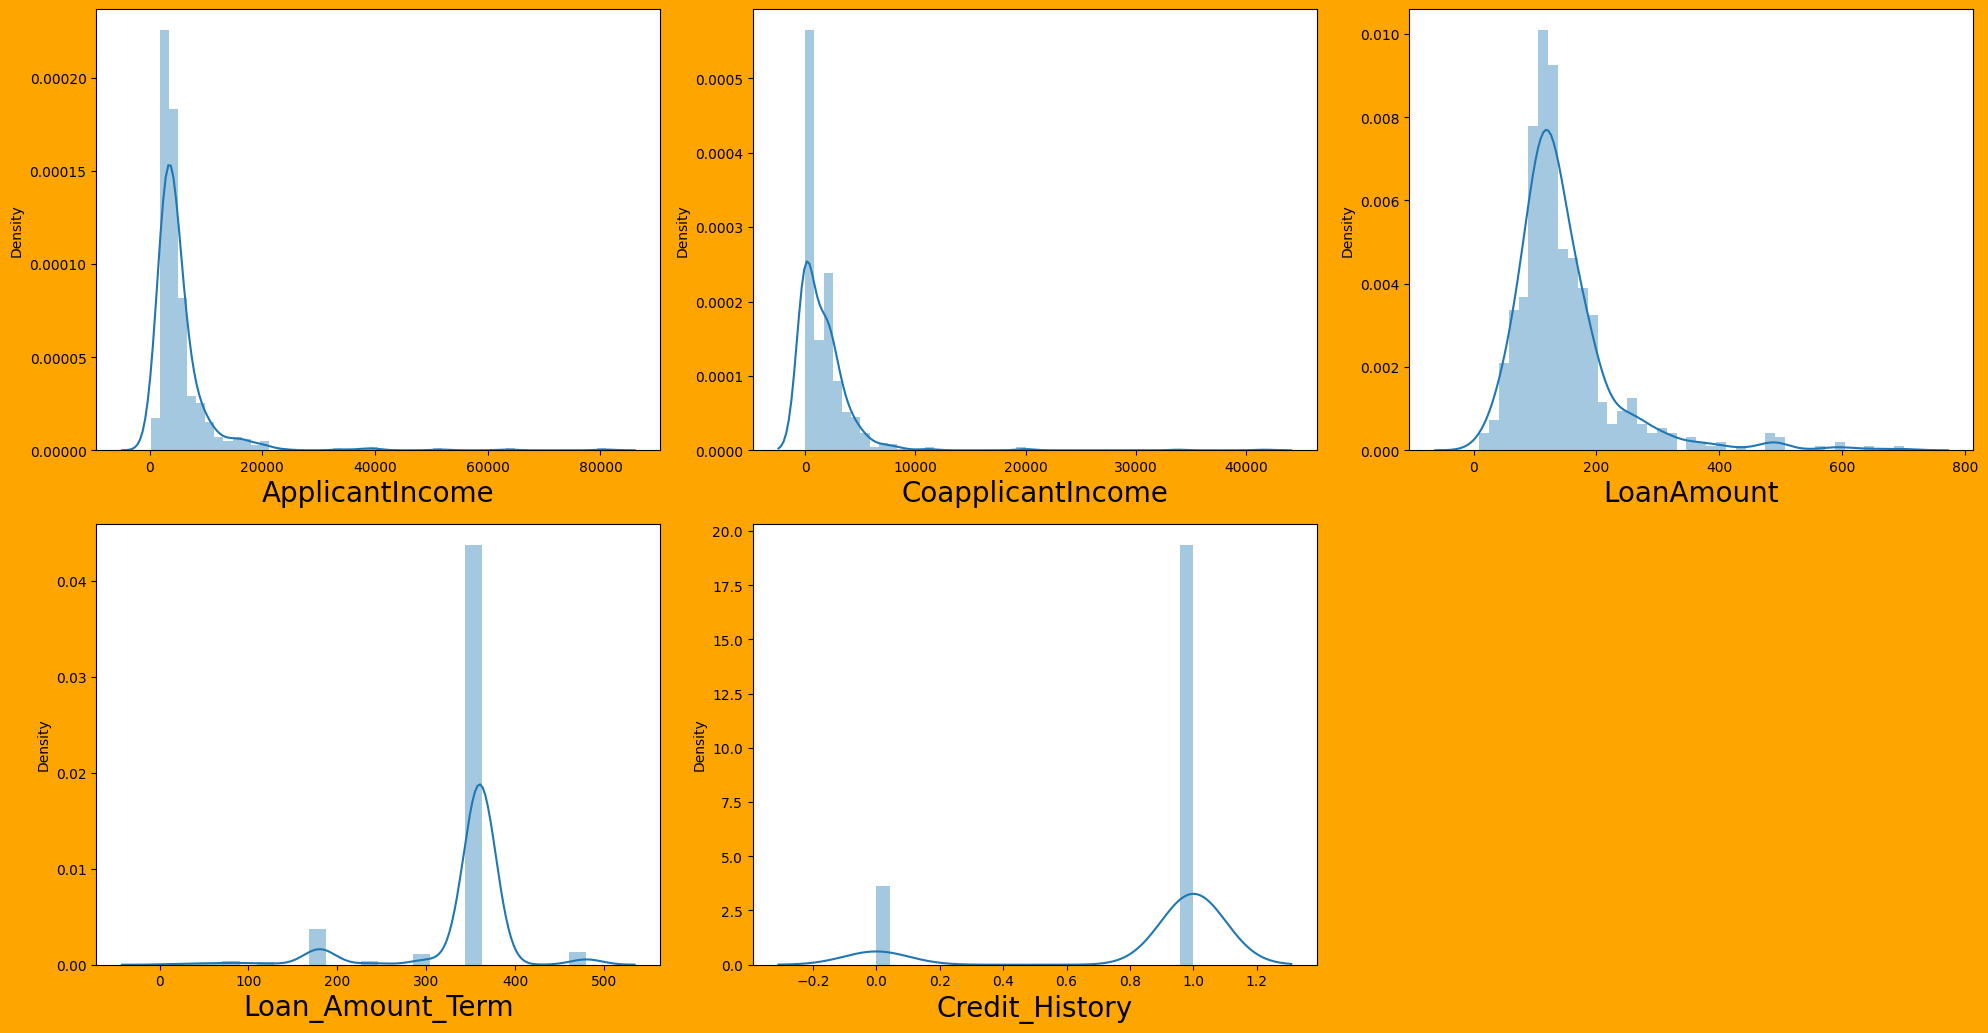

In [ ]:
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber = 1

for column in data.select_dtypes(include=['int64', 'float64']):  # Only select numeric columns
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column], kde=True)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

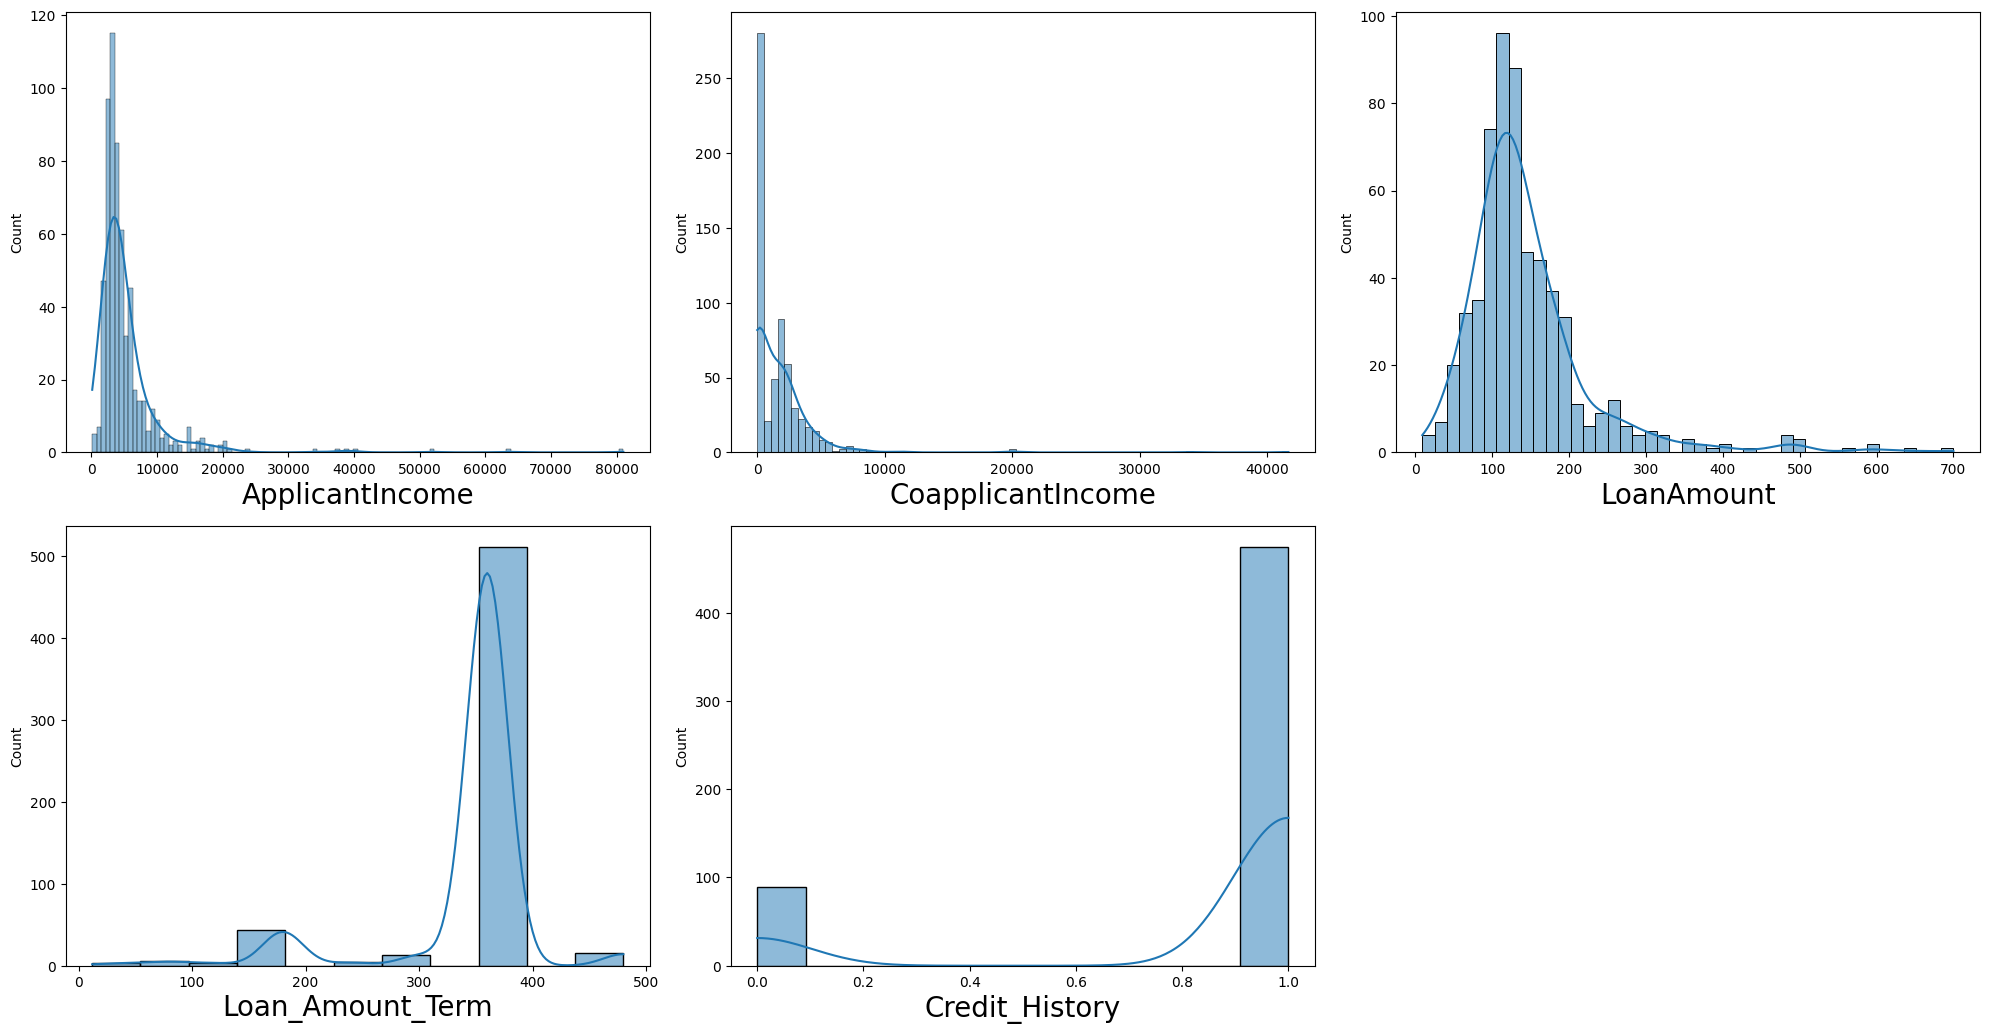

In [ ]:
plt.figure(figsize=(20, 15))
plotnumber = 1

# Plot numeric columns
for column in data.select_dtypes(include=['int64', 'float64']):  # Only select numeric columns
    if plotnumber <= 9:  # Limit to 9 plots
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

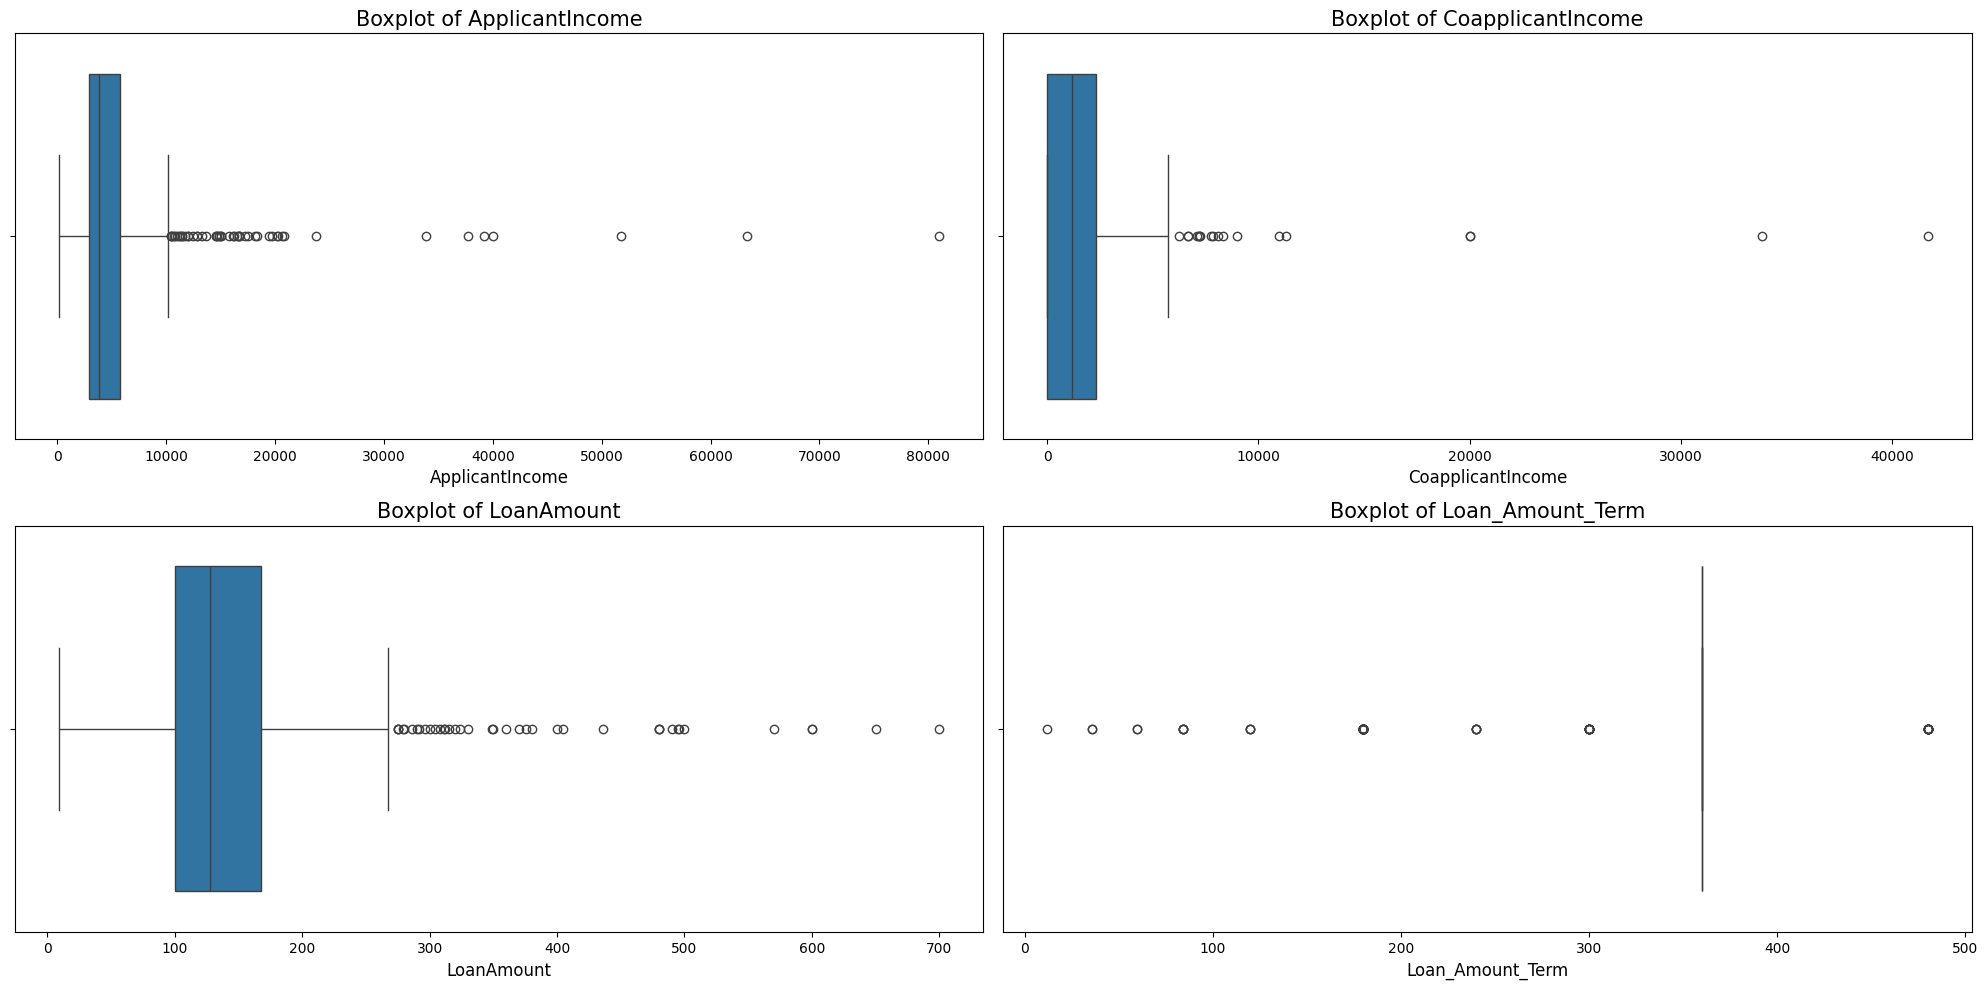

In [ ]:
plt.figure(figsize=(20, 10))

# Columns to check for outliers in the loan dataset
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


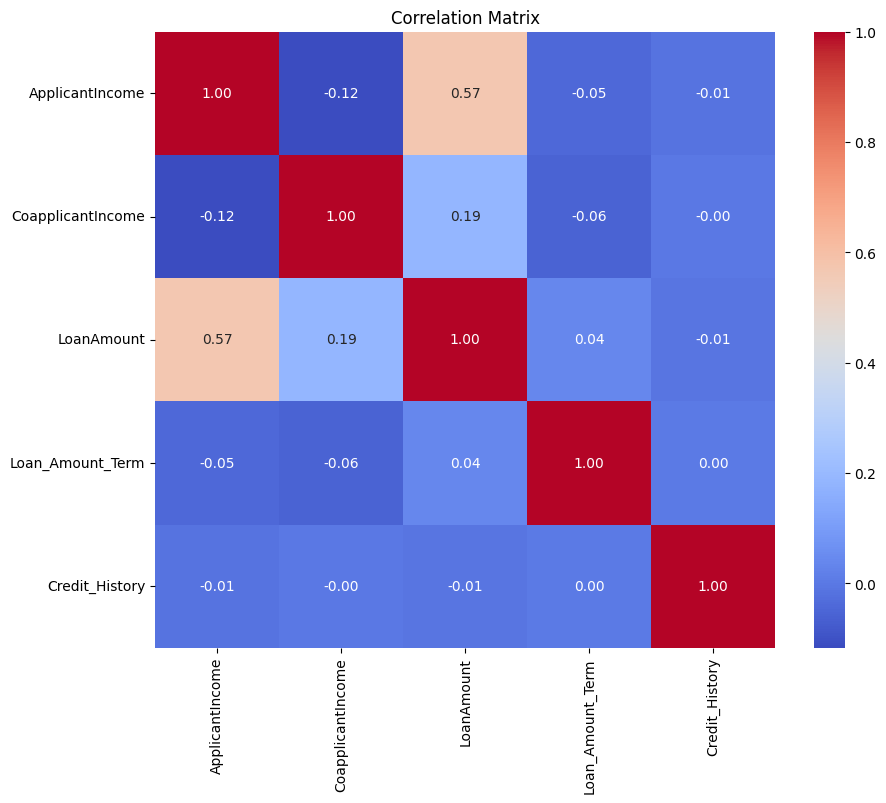

In [ ]:
# Heatmap to check for correlations

numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Preproccesing
We will start with fixing the skewness that has been observed in the data

In [ ]:
# Apply log transformation to reduce skewness
data['ApplicantIncome'] = np.log1p(data['ApplicantIncome'])  # log1p to handle zero values
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])
data['LoanAmount'] = np.log1p(data['LoanAmount'])

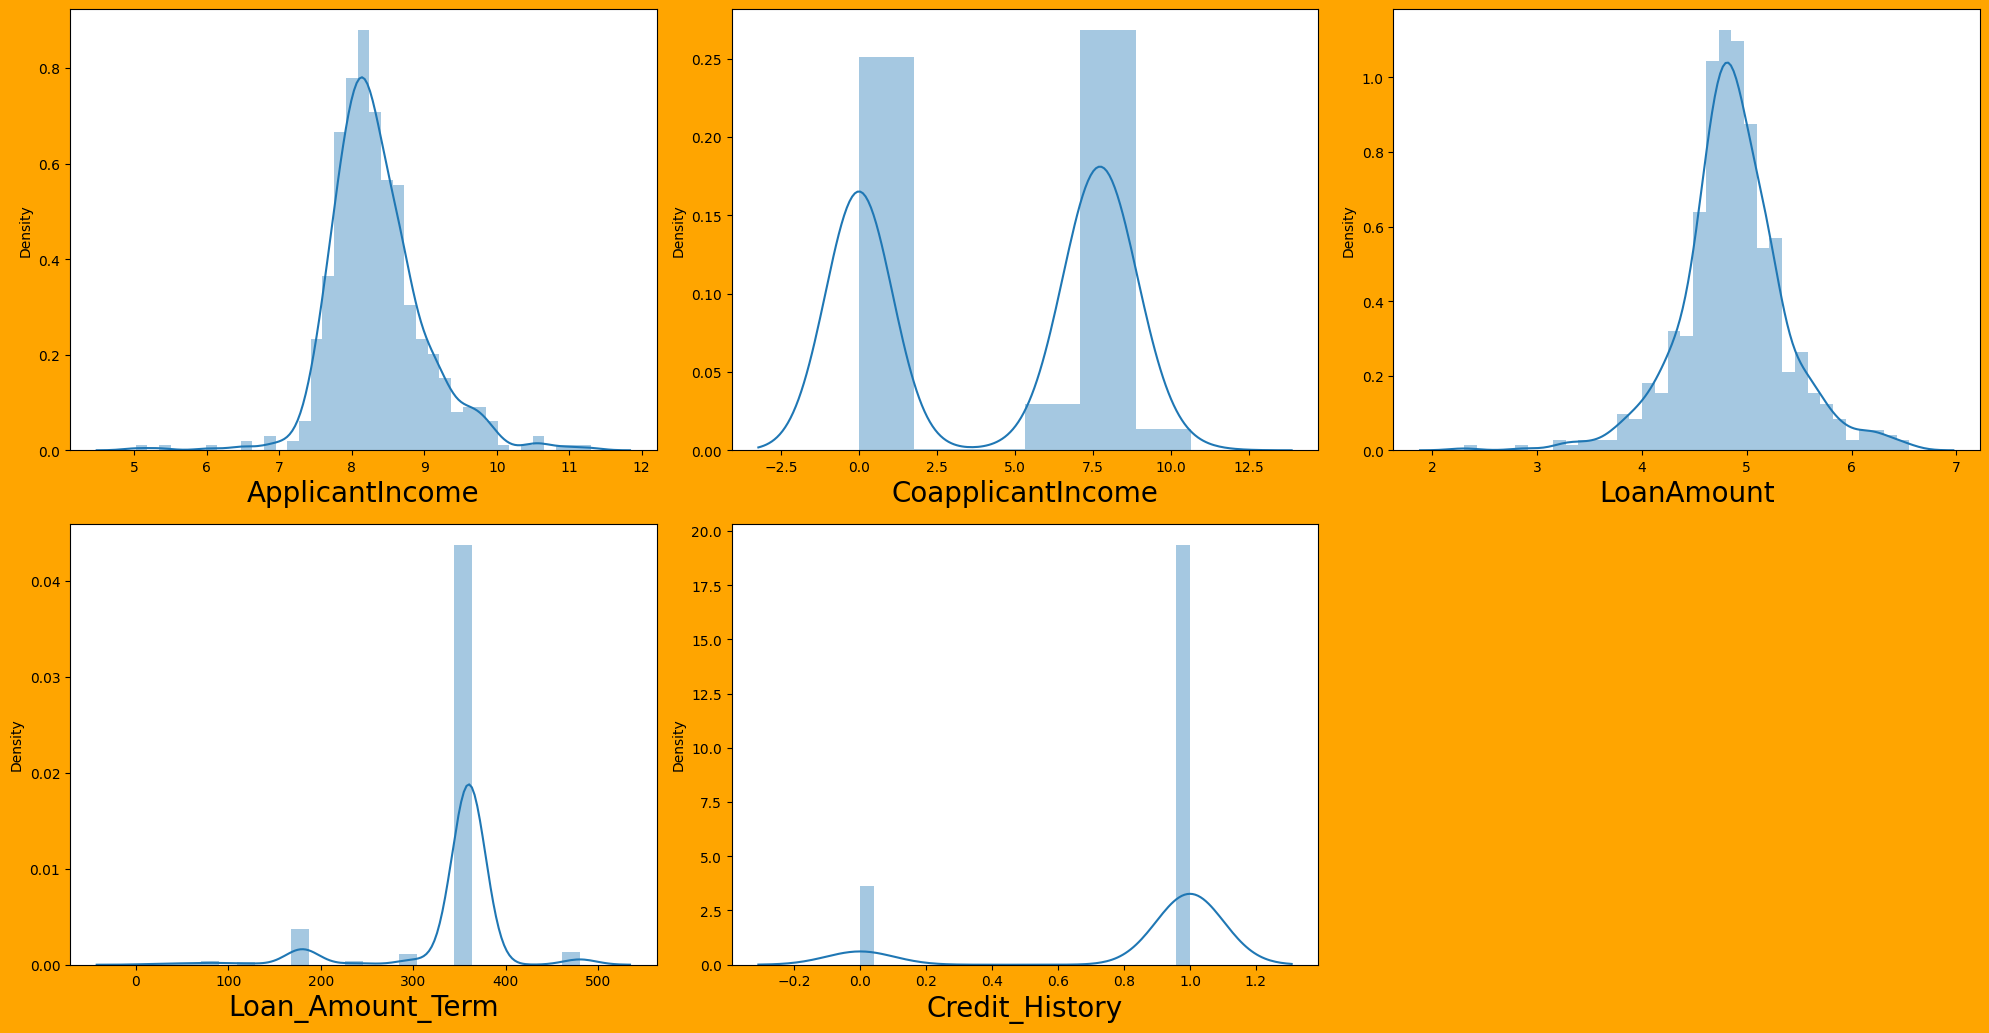

In [ ]:
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber = 1

for column in data.select_dtypes(include=['int64', 'float64']):  # Only select numeric columns
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column], kde=True)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

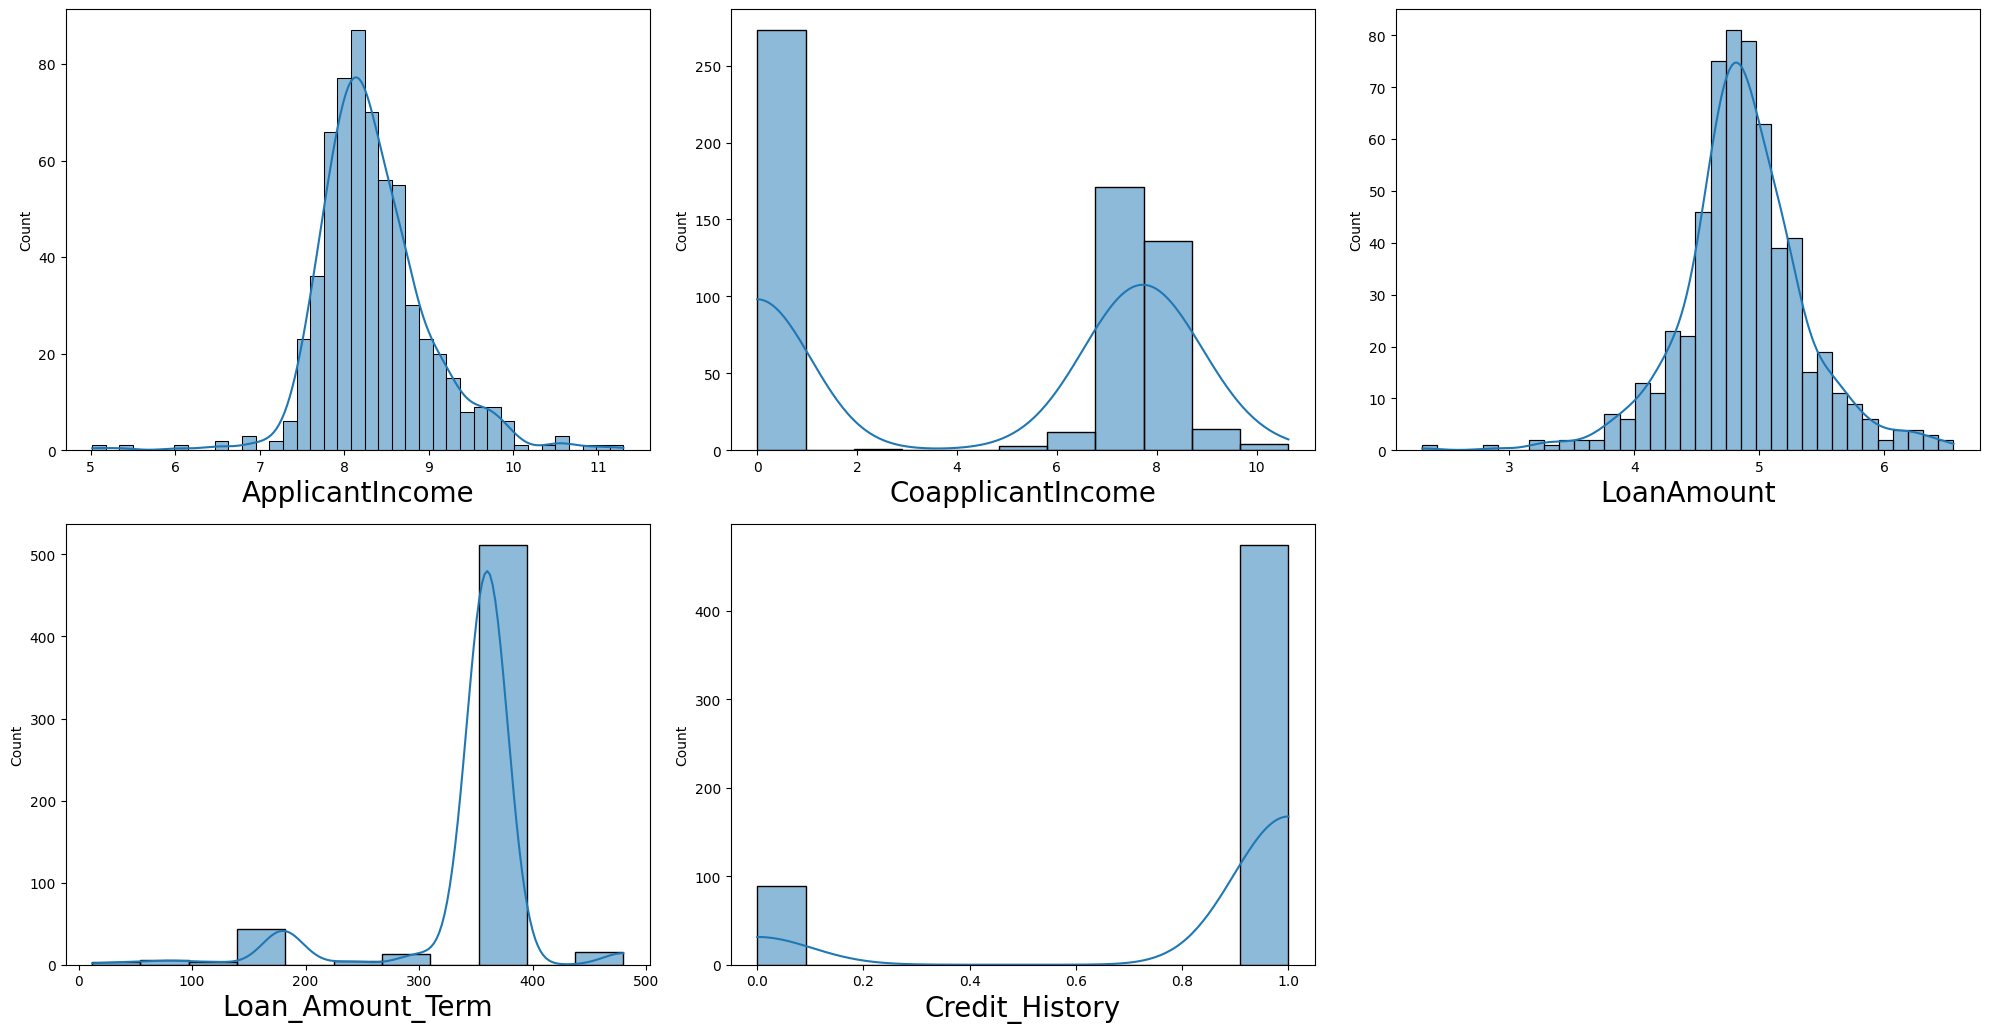

In [ ]:
plt.figure(figsize=(20, 15))
plotnumber = 1

# Plot numeric columns
for column in data.select_dtypes(include=['int64', 'float64']):  # Only select numeric columns
    if plotnumber <= 9:  # Limit to 9 plots
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

Now that the skewness has improved, we will go ahead and remove the outliers observed in the data.

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from specific columns
data = remove_outliers(data, 'ApplicantIncome')
data = remove_outliers(data, 'CoapplicantIncome')
data = remove_outliers(data, 'LoanAmount')


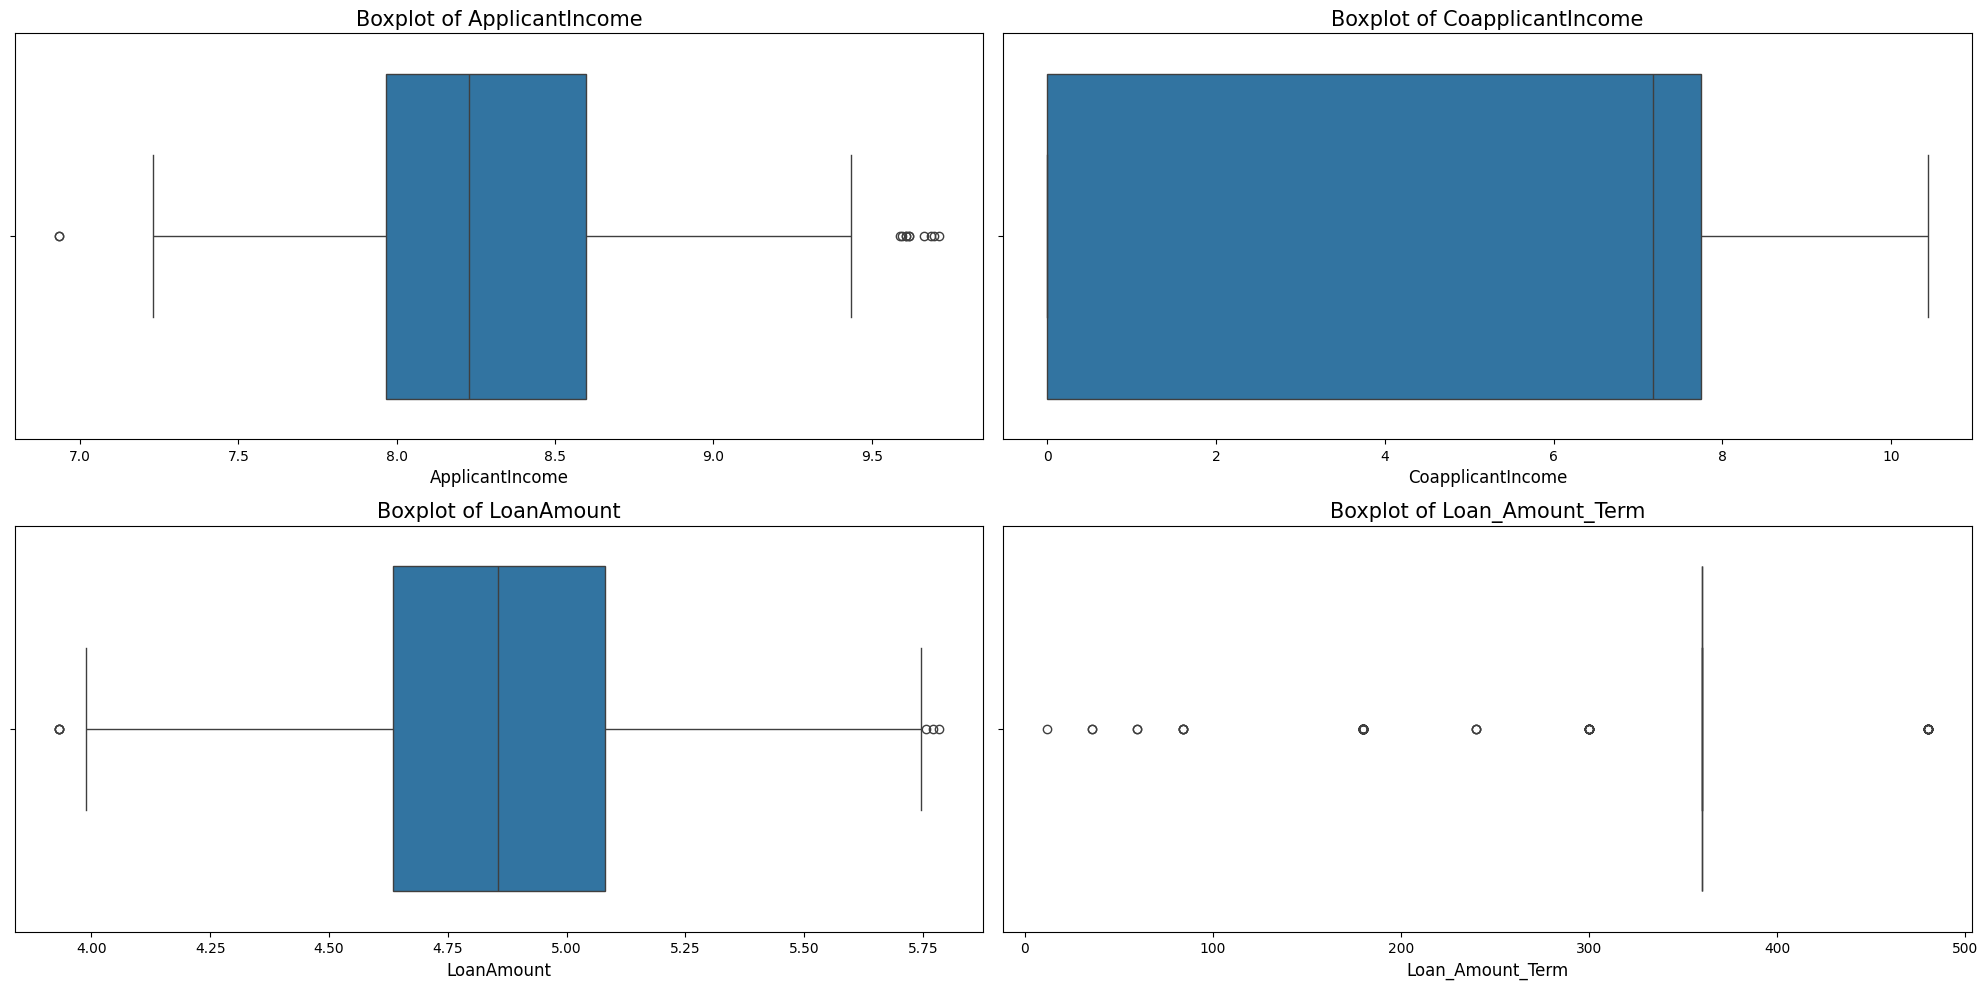

In [ ]:
plt.figure(figsize=(20, 10))

# Columns to check for outliers in the loan dataset
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

Now that the outliers have been removed, we can go ahead to the next step, which is removing null values from the dataset.

In [ ]:
# Filling missing values in categorical columns with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Filling missing values in numeric columns
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


We have removed the null values in the code. Now we can go ahead and remove any unneccessary columns in the dataset

In [ ]:
# Dropping the Loan_ID column
data.drop(columns=['Loan_ID'], inplace=True)

In [ ]:
data.shape

(538, 12)

Let's proceed with one-hot encoding for the categorical variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2,1
5,1,1,2,0,1,8.597482,8.342125,5.590987,360.0,1.0,2,1


Here, we can see that for Loan Status, 0 stands for Yes and 1 stands for No

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Training Features Shape: (430, 11)
Test Features Shape: (108, 11)
Training Labels Shape: (430,)
Test Labels Shape: (108,)


Let's move on to Standardizing the data using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Defining a function that checks the model's Accuracy, MAE, MSE, R2 Score

In [ ]:
# We have defined a metric method that prints the mae, mse and r2 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

def metrics_score(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(X_train)
        print("==================Training Score=================")
        print("Accuracy ==> ", accuracy_score(y_train, y_pred))
        print("Mean Absolute Error (MAE) ==> ", mean_absolute_error(y_train, y_pred))
        print("Mean Squared Error (MSE) ==> ", mean_squared_error(y_train, y_pred))
        print("R-squared (R2) ==> ", r2_score(y_train, y_pred))
    else:
        y_pred = model.predict(X_test)
        print("==================Test Score=================")
        print("Accuracy ==> ", accuracy_score(y_test, y_pred))
        print("Mean Absolute Error (MAE) ==> ", mean_absolute_error(y_test, y_pred))
        print("Mean Squared Error (MSE) ==> ", mean_squared_error(y_test, y_pred))
        print("R-squared (R2) ==> ", r2_score(y_test, y_pred))


## 1st Model: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression
logistic_reg = LogisticRegression()

# Fit the model on the training set
logistic_reg.fit(X_train, y_train)

# Print training metrics
metrics_score(logistic_reg, X_train, X_test, y_train, y_test, train=True)

# Print test metrics
metrics_score(logistic_reg, X_train, X_test, y_train, y_test, train=False)

# Cross-validation (5-fold) to check for model robustness
cv_scores_logistic = cross_val_score(logistic_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression Cross-Validation Accuracy: {cv_scores_logistic.mean():.4f}')


==================Training Score=================
Accuracy ==>  0.8348837209302326
Mean Absolute Error (MAE) ==>  0.16511627906976745
Mean Squared Error (MSE) ==>  0.16511627906976745
R-squared (R2) ==>  0.21021316225165565
==================Test Score=================
Accuracy ==>  0.75
Mean Absolute Error (MAE) ==>  0.25
Mean Squared Error (MSE) ==>  0.25
R-squared (R2) ==>  -0.09624060150375957
Logistic Regression Cross-Validation Accuracy: 0.8326


## 2nd Model: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training set
decision_tree.fit(X_train, y_train)

# Print training metrics
metrics_score(decision_tree, X_train, X_test, y_train, y_test, train=True)

# Print test metrics
metrics_score(decision_tree, X_train, X_test, y_train, y_test, train=False)

# Cross-validation (5-fold)
cv_scores_decision_tree = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
print(f'Decision Tree Cross-Validation Accuracy: {cv_scores_decision_tree.mean():.4f}')


==================Training Score=================
Accuracy ==>  1.0
Mean Absolute Error (MAE) ==>  0.0
Mean Squared Error (MSE) ==>  0.0
R-squared (R2) ==>  1.0
==================Test Score=================
Accuracy ==>  0.7129629629629629
Mean Absolute Error (MAE) ==>  0.28703703703703703
Mean Squared Error (MSE) ==>  0.28703703703703703
R-squared (R2) ==>  -0.25864661654135346
Decision Tree Cross-Validation Accuracy: 0.7372


## 3rd Model: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Print training metrics
metrics_score(random_forest, X_train, X_test, y_train, y_test, train=True)

# Print test metrics
metrics_score(random_forest, X_train, X_test, y_train, y_test, train=False)

# Cross-validation (5-fold)
cv_scores_random_forest = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest Cross-Validation Accuracy: {cv_scores_random_forest.mean():.4f}')

==================Training Score=================
Accuracy ==>  1.0
Mean Absolute Error (MAE) ==>  0.0
Mean Squared Error (MSE) ==>  0.0
R-squared (R2) ==>  1.0
==================Test Score=================
Accuracy ==>  0.7222222222222222
Mean Absolute Error (MAE) ==>  0.2777777777777778
Mean Squared Error (MSE) ==>  0.2777777777777778
R-squared (R2) ==>  -0.21804511278195515
Random Forest Cross-Validation Accuracy: 0.8209


## 4th Model: K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Fit the model on the training set
knn.fit(X_train, y_train)

# Print training metrics
metrics_score(knn, X_train, X_test, y_train, y_test, train=True)

# Print test metrics
metrics_score(knn, X_train, X_test, y_train, y_test, train=False)

# Cross-validation (5-fold)
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(f'K-Nearest Neighbors Cross-Validation Accuracy: {cv_scores_knn.mean():.4f}')


==================Training Score=================
Accuracy ==>  0.8511627906976744
Mean Absolute Error (MAE) ==>  0.14883720930232558
Mean Squared Error (MSE) ==>  0.14883720930232558
R-squared (R2) ==>  0.2880794701986755
==================Test Score=================
Accuracy ==>  0.7314814814814815
Mean Absolute Error (MAE) ==>  0.26851851851851855
Mean Squared Error (MSE) ==>  0.26851851851851855
R-squared (R2) ==>  -0.17744360902255663
K-Nearest Neighbors Cross-Validation Accuracy: 0.8302


## 5th Model: MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# Multilayer Perceptron Classifier
mlp = MLPClassifier()

# Fit the model on the training set
mlp.fit(X_train, y_train)

# Print training metrics
metrics_score(mlp, X_train, X_test, y_train, y_test, train=True)

# Print test metrics
metrics_score(mlp, X_train, X_test, y_train, y_test, train=False)

# Cross-validation accuracy (5-fold)
cv_scores_mlp = cross_val_score(mlp, X_train, y_train, cv=5, scoring='accuracy')
print(f'MLP Cross-Validation Accuracy: {cv_scores_mlp.mean():.4f}')


==================Training Score=================
Accuracy ==>  0.8627906976744186
Mean Absolute Error (MAE) ==>  0.1372093023255814
Mean Squared Error (MSE) ==>  0.1372093023255814
R-squared (R2) ==>  0.343698261589404
==================Test Score=================
Accuracy ==>  0.7314814814814815
Mean Absolute Error (MAE) ==>  0.26851851851851855
Mean Squared Error (MSE) ==>  0.26851851851851855
R-squared (R2) ==>  -0.17744360902255663
MLP Cross-Validation Accuracy: 0.8186


## 6th Model: SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize Support Vector Classifier
svm_model = SVC(random_state=42)

# Fit the model on the training set
svm_model.fit(X_train, y_train)

# Print training metrics
metrics_score(svm_model, X_train, X_test, y_train, y_test, train=True)

# Print test metrics
metrics_score(svm_model, X_train, X_test, y_train, y_test, train=False)

# Cross-validation (5-fold) to check for model robustness
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'SVM Cross-Validation Accuracy: {cv_scores_svm.mean():.4f}')

==================Training Score=================
Accuracy ==>  0.8441860465116279
Mean Absolute Error (MAE) ==>  0.1558139534883721
Mean Squared Error (MSE) ==>  0.1558139534883721
R-squared (R2) ==>  0.2547081953642384
==================Test Score=================
Accuracy ==>  0.75
Mean Absolute Error (MAE) ==>  0.25
Mean Squared Error (MSE) ==>  0.25
R-squared (R2) ==>  -0.09624060150375957
SVM Cross-Validation Accuracy: 0.8349


| Model                | Training Accuracy | Test Accuracy | Cross-Validation Accuracy |
|----------------------|-------------------|---------------|---------------------------|
| Logistic Regression  | 83.49%           | 75.00%       | 83.26%                    |
| Decision Tree        | 100%             | 71.30%       | 73.72%                    |
| Random Forest        | 100%             | 72.22%       | 82.09%                    |
| K-Nearest Neighbors  | 85.12%           | 73.15%       | 83.02%                    |
| MLP                  | 86.28%           | 74.07%       | 81.40%                    |
| SVM                  | 84.41%           | 75.00%       | 83.49%  

Logistic Regression and SVM performs the best on the test set and even after Cross Validating.

## Hyperparameter Tuning
Let's perform Hyperparameter Tuning on the best model, which is SVM and Logistic Regression, and Random Forest, since it is close to SVM and performs well after hyperparameter tuning

### Hyperparameter Tuning for SVM

In [ ]:
from sklearn.svm import SVC

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1,0.5, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM and GridSearchCV
svm_model = SVC(random_state=42,class_weight='balanced')
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on SVM
grid_search_svm.fit(X_train, y_train)

# Best parameters and score for SVM
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy for SVM:", grid_search_svm.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy for SVM: 0.8302325581395348


### Hyperparameter Tuning for Logistic Regression

In [ ]:
# Define parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize Logistic Regression and GridSearchCV
logistic_reg = LogisticRegression(random_state=42,class_weight='balanced')
grid_search_logistic = GridSearchCV(estimator=logistic_reg, param_grid=param_grid_logistic, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on Logistic Regression
grid_search_logistic.fit(X_train, y_train)

# Best parameters and score for Logistic Regression
print("Best Parameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", grid_search_logistic.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'solver': 'saga'}
Best Cross-Validation Accuracy for Logistic Regression: 0.8069767441860465


## Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest and GridSearchCV
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on Random Forest
grid_search_rf.fit(X_train, y_train)

# Best parameters and score for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f'Test Accuracy of the Best Random Forest Model: {test_accuracy:.4f}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest: 0.8348837209302324
Test Accuracy of the Best Random Forest Model: 0.7222


## Saving the 3 Models using Pickle

In [ ]:
import pickle

# Save the best Logistic Regression model
with open('best_logistic_model.pkl', 'wb') as file:
    pickle.dump(grid_search_logistic.best_estimator_, file)

with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(grid_search_rf.best_estimator_, file)

with open('best_svm_model.pkl', 'wb') as file:
    pickle.dump(grid_search_svm.best_estimator_, file)

## Testing all 3 Models

Example 1 explaination:
*   A male applicant who is married, has no dependents, and is a graduate.
*   Not self-employed with an income of 5000 and a coapplicant income of 2000.
*   Requested a loan amount of 150 (in thousands) for a term of 360 months.
*   Has a good credit history, and lives in an urban area.



Example 2 explaination:


*   A female applicant who is not married, with 1 dependent and not a graduate.
*   Self-employed with an income of 3000, and no coapplicant income.
*   Requested a loan of 100 (in thousands) for a term of 120 months.
*   Has a poor credit history and lives in a rural area.

Example 3 explaination:
* A male applicant who is married, with 2 dependents, and is a graduate.
* Not self-employed with a high income of 8000, plus a coapplicant income of 3000.
* Requested loan amount of 200 (in thousands) with a 30-year term for manageable payments.
* Good credit history and residence in an urban area, both favorable indicators.


In [70]:
import pickle


# [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
test_application_data = [
    [1, 1, 0, 1, 0, 5000, 2000, 150, 360, 1, 2],  # Example 1
    [0, 0, 1, 0, 1, 3000, 0, 100, 120, 0, 0],     # Example 2
    [1, 1, 2, 1, 0, 8000, 3000, 200, 360, 1, 2]   # Example 3
]

def print_predictions(model_name, predictions):
    print(f"\n{model_name} Predictions for new examples:")
    for i, prediction in enumerate(predictions, start=1):
        status = "Loan Approved" if prediction == 1 else "Loan Not Approved"
        print(f"Example {i}: {status}")


# Load and test Logistic Regression model
with open('best_logistic_model.pkl', 'rb') as model_file:
    logistic_model = pickle.load(model_file)
logistic_predictions = logistic_model.predict(test_application_data)
print("Logistic Regression Predictions for the examples:", logistic_predictions)
print_predictions("Logistic Regression", logistic_predictions)

# Load and test Random Forest model
with open('best_random_forest_model.pkl', 'rb') as model_file:
    random_forest_model = pickle.load(model_file)
rf_predictions = random_forest_model.predict(test_application_data)
print("Random Forest Predictions for the examples:", rf_predictions)
print_predictions("Random Forest", rf_predictions)

# Load and test SVM model
with open('best_svm_model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)
svm_predictions = svm_model.predict(test_application_data)
print("SVM Predictions for the examples:", svm_predictions)
print_predictions("SVM", svm_predictions)


Logistic Regression Predictions for the examples: [0 0 0]

Logistic Regression Predictions for new examples:
Example 1: Loan Not Approved
Example 2: Loan Not Approved
Example 3: Loan Not Approved
Random Forest Predictions for the examples: [0 1 1]

Random Forest Predictions for new examples:
Example 1: Loan Not Approved
Example 2: Loan Approved
Example 3: Loan Approved
SVM Predictions for the examples: [0 0 0]

SVM Predictions for new examples:
Example 1: Loan Not Approved
Example 2: Loan Not Approved
Example 3: Loan Not Approved


#### Therefore, we can see **Random Forest** performs the best and gives relatively more accurate predictions in comparison to Logistic Regression and SVMs.